In [1]:
from mlxtend.data import loadlocal_mnist
import platform
import numpy as np
import matplotlib.pyplot as plt
import imageio
from os import listdir
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
trainX, trainy = loadlocal_mnist(
          images_path='/content/drive/MyDrive/Study/AMATH_584/HW6/train-images-idx3-ubyte', 
          labels_path='/content/drive/MyDrive/Study/AMATH_584/HW6/train-labels-idx1-ubyte')

In [3]:
testX, testy = loadlocal_mnist(
          images_path='/content/drive/MyDrive/Study/AMATH_584/HW6/t10k-images-idx3-ubyte', 
          labels_path='/content/drive/MyDrive/Study/AMATH_584/HW6/t10k-labels-idx1-ubyte')

In [4]:
trainX.shape


(60000, 784)

In [6]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


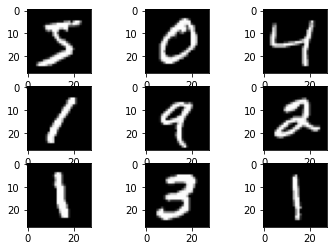

In [7]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
## label convert to matrix 
n_train = trainX.shape[0]
n_test = testX.shape[0]
trainy_mat = np.zeros((n_train,10))
testy_mat = np.zeros((n_test,10))

In [9]:
for i in range(n_train):
  trainy_mat[i,int(trainy[i])] = 1 

In [10]:
for i in range(n_test):
  testy_mat[i,int(testy[i])] = 1 

In [11]:
trainy[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
trainy_mat[0:10,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## Q1 use pinv to solve AX=B

In [31]:
#trainX * X = trainy_mat -> (60000, 784)*X = trainy_mat(60000,10) ->  the shape of X is (784,10)
coeffs_v0 = np.dot(np.linalg.pinv(trainX),trainy_mat)
print(coeffs_v0.shape)
pred_train_pinv_v0 = np.dot(trainX,coeffs_v0)
pred_test_pinv_v0 = np.dot(testX,coeffs_v0)

(784, 10)


In [33]:
#accuray
trainy_maxind=np.argmax(pred_train_pinv_v0,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for pinv: " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_pinv_v0,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for pinv: " + str(np.around(accuracy,2))+"%")

Train: accuray for pinv: 85.19%
Test: accuray for pinv: 85.34%


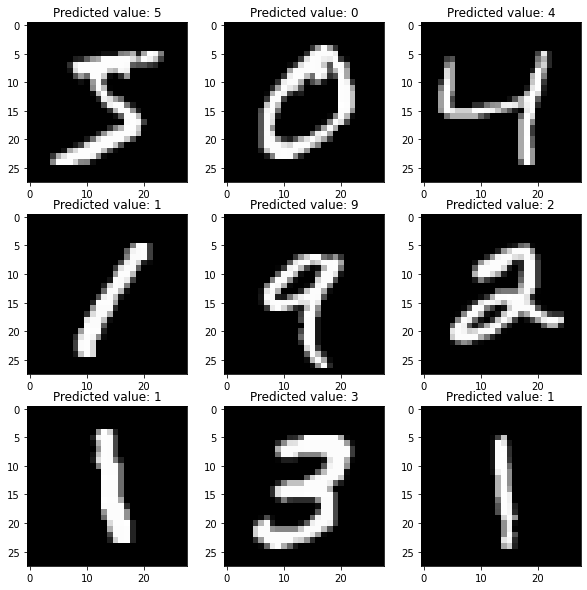

In [37]:
# plot first few images and print the predicted values
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Predicted value: ' + str(trainy_maxind[i]))
# show the figure
plt.show()

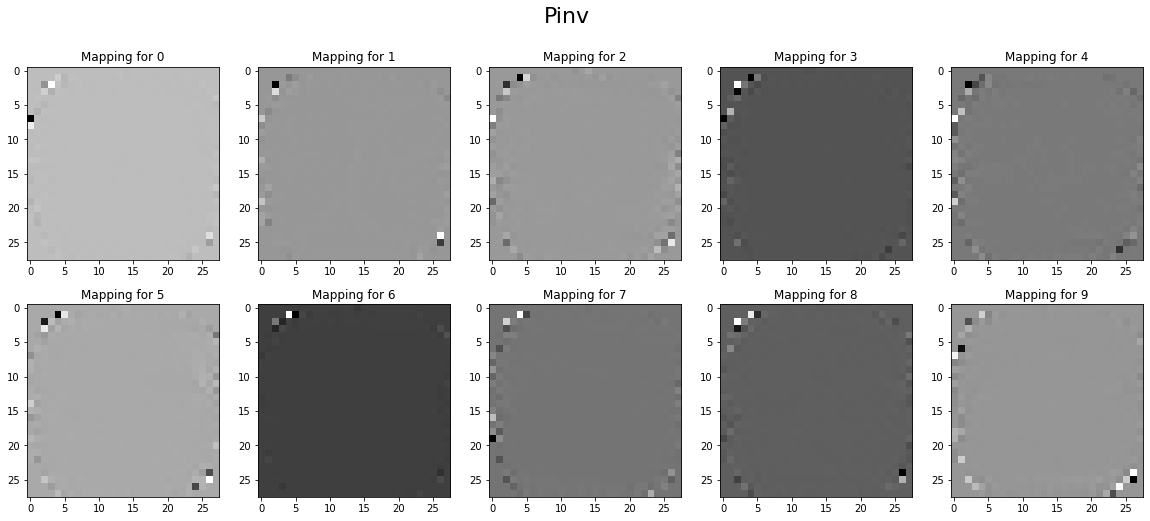

In [41]:
# plot the mapping 
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v0[:,i],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Pinv',fontsize=22)
plt.show()

## Q1 use lasso to solve AX=B

In [13]:
model_lasso_v1 = Lasso(alpha=0.01)
model_lasso_v1.fit(trainX, trainy_mat) 
pred_train_lasso_v1= model_lasso_v1.predict(trainX)

pred_test_lasso_v1= model_lasso_v1.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v1,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=0.01): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v1,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=0.01): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=0,01): 85.57%
Test: accuray for lasso (alpha=0,01): 86.12%


In [14]:
model_lasso_v2 = Lasso(alpha=0.1)
model_lasso_v2.fit(trainX, trainy_mat) 
pred_train_lasso_v2= model_lasso_v2.predict(trainX)

pred_test_lasso_v2= model_lasso_v2.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v2,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=0.1): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v2,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=0.1): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=0.1): 85.09%
Test: accuray for lasso (alpha=0.1): 85.76%


In [15]:
model_lasso_v3 = Lasso(alpha=0.2)
model_lasso_v3.fit(trainX, trainy_mat) 
pred_train_lasso_v3= model_lasso_v3.predict(trainX)

pred_test_lasso_v3= model_lasso_v3.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v3,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=0.2): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v3,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=0.2): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=0.2): 84.79%
Test: accuray for lasso (alpha=0.2): 85.49%


In [16]:
model_lasso_v4 = Lasso(alpha=0.5)
model_lasso_v4.fit(trainX, trainy_mat) 
pred_train_lasso_v4= model_lasso_v4.predict(trainX)

pred_test_lasso_v4= model_lasso_v4.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v4,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=0.5): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v4,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=0.5): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=0.5): 83.89%
Test: accuray for lasso (alpha=0.5): 84.73%


In [17]:
model_lasso_v5 = Lasso(alpha=0.7)
model_lasso_v5.fit(trainX, trainy_mat) 
pred_train_lasso_v5= model_lasso_v5.predict(trainX)

pred_test_lasso_v5= model_lasso_v5.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v5,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=0.7): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v5,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=0.7): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=0.7): 83.18%
Test: accuray for lasso (alpha=0.7): 83.97%


In [18]:
model_lasso_v6 = Lasso(alpha=1)
model_lasso_v6.fit(trainX, trainy_mat) 
pred_train_lasso_v6= model_lasso_v6.predict(trainX)

pred_test_lasso_v6= model_lasso_v6.predict(testX)

#accuray
trainy_maxind=np.argmax(pred_train_lasso_v6,axis=1)
accuracy= 100*np.sum(trainy_maxind[:]==trainy[:])/np.size(trainy)
print("Train: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")
test_maxind=np.argmax(pred_test_lasso_v6,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

Train: accuray for lasso (alpha=1): 82.23%
Test: accuray for lasso (alpha=1): 83.1%


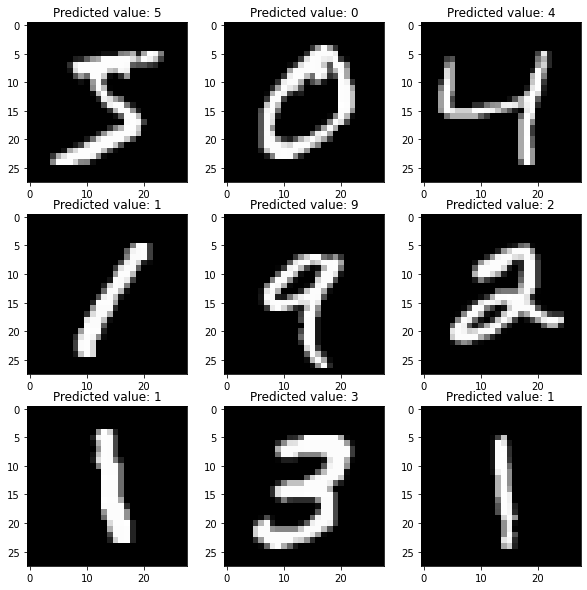

In [42]:
# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Predicted value: ' + str(trainy_maxind[i]))
# show the figure
plt.show()

In [19]:
coeffs_v1 = model_lasso_v1.coef_
coeffs_v2 = model_lasso_v2.coef_
coeffs_v3 = model_lasso_v3.coef_
coeffs_v4 = model_lasso_v4.coef_
coeffs_v5 = model_lasso_v5.coef_
coeffs_v6 = model_lasso_v6.coef_

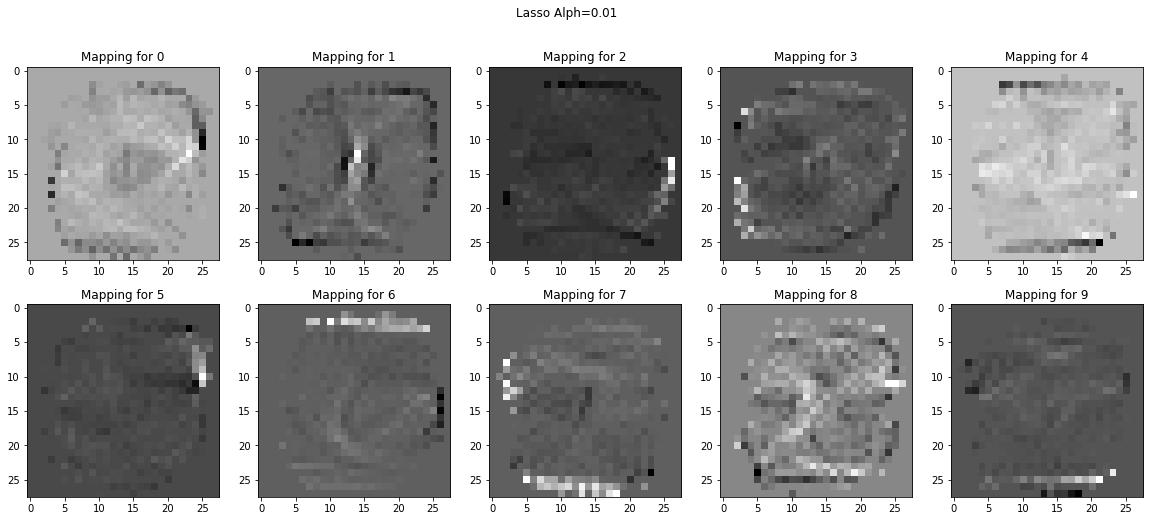

In [20]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v1[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=0.01')
plt.show()

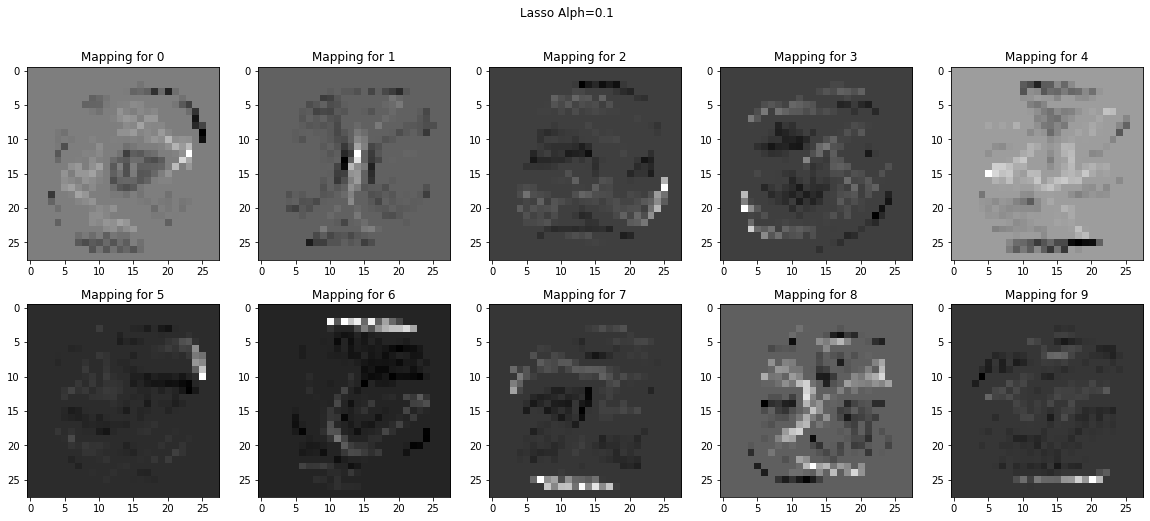

In [21]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v2[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=0.1')
plt.show()

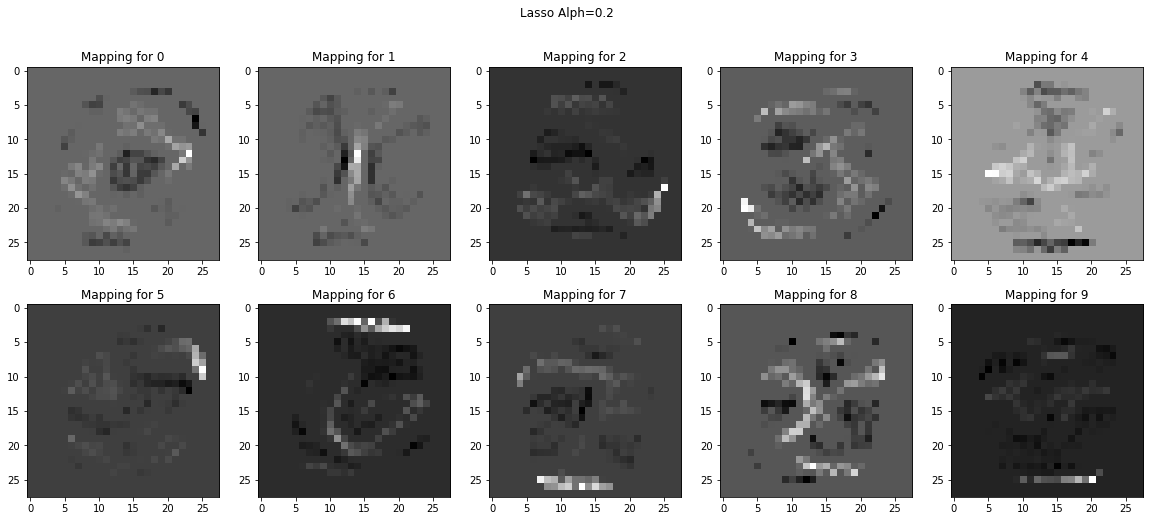

In [22]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v3[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=0.2')
plt.show()

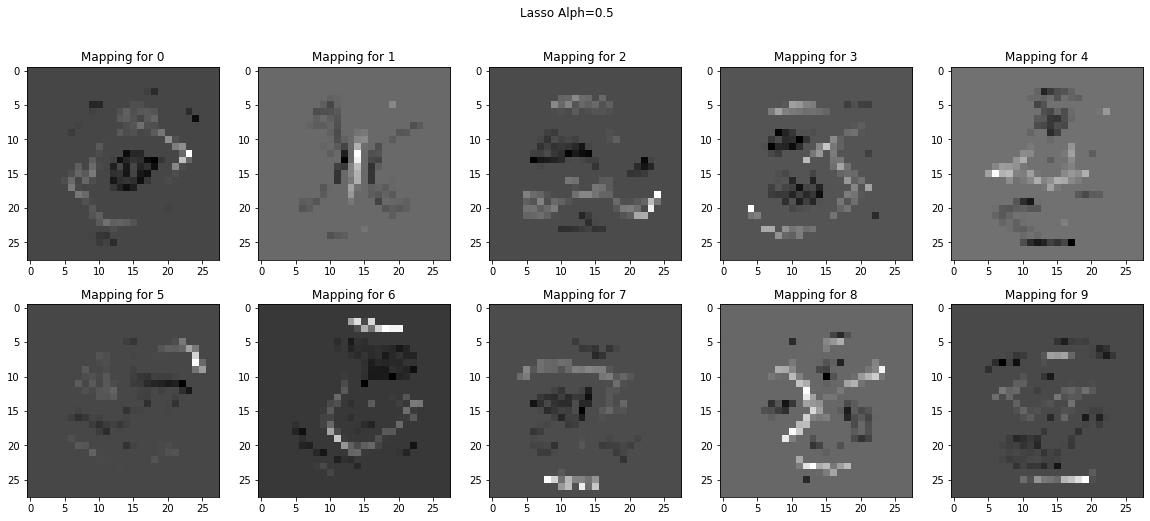

In [23]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v4[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=0.5')
plt.show()

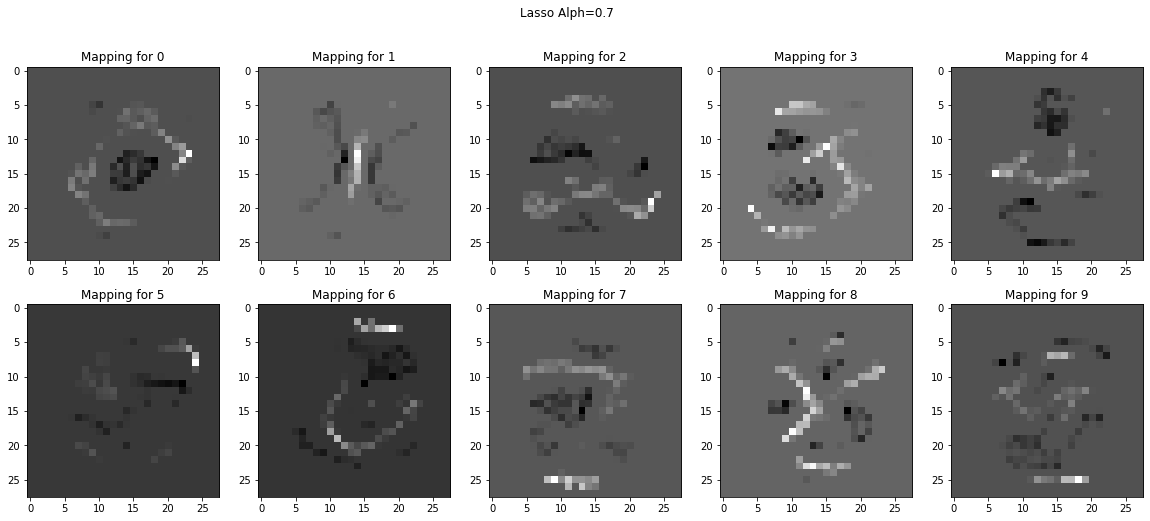

In [24]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v5[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=0.7')
plt.show()

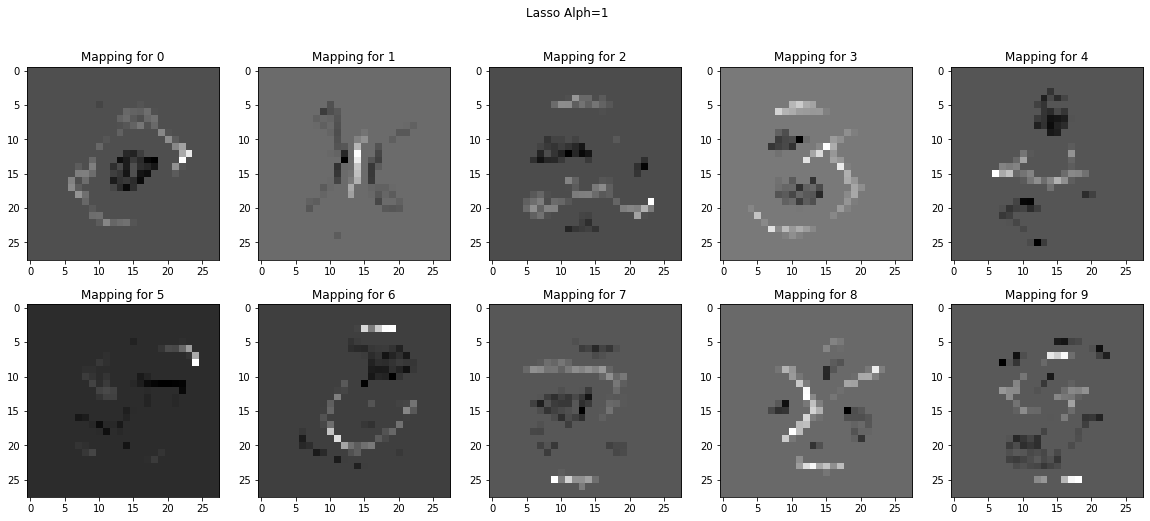

In [25]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v6[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=1')
plt.show()

##Q2: determined the fixels in the MNIST set are most informative 

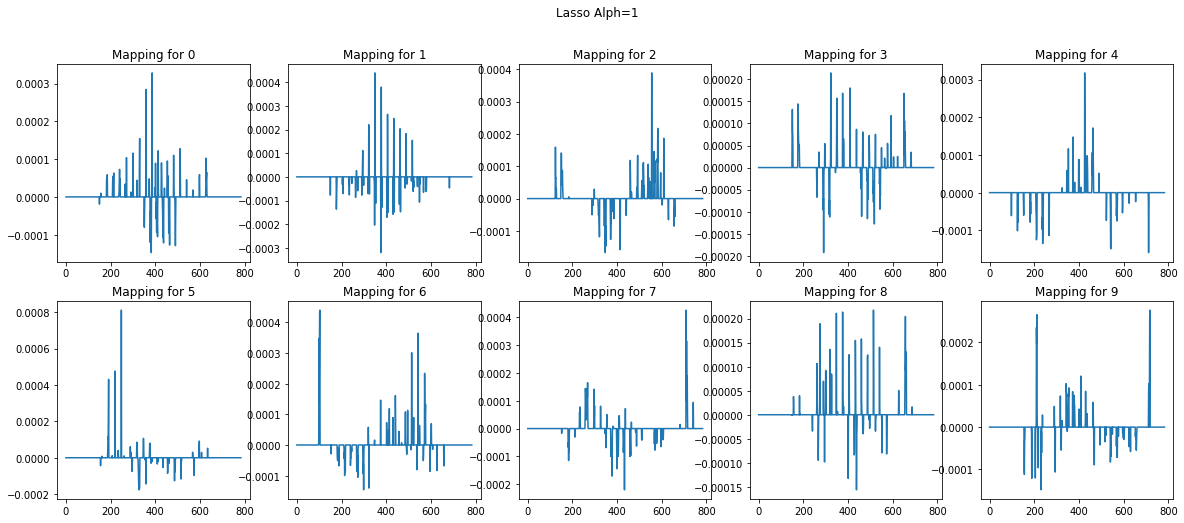

In [29]:
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.plot(coeffs_v6[i,:])
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=1')
plt.show()

set the pixels with values smaller than the 0.1 of the largest values as zero. In others words, only use the pixels larger than 0.1 of the largest values as mapping 

In [43]:
coeffs_v6.shape

(10, 784)

In [53]:
coeffs_v6_max = np.amax(np.abs(coeffs_v6),axis=1)
for i in range(10):
  print("largest value for " + str(i) + ": " + str(coeffs_v6_max[i]))

largest value for 0: 0.00032822709610594547
largest value for 1: 0.00043906514084040627
largest value for 2: 0.0003886391602085748
largest value for 3: 0.00021476418943375424
largest value for 4: 0.00031757216098739037
largest value for 5: 0.0008116104019848139
largest value for 6: 0.00044000982630985777
largest value for 7: 0.00042495396586472164
largest value for 8: 0.0002176060084095319
largest value for 9: 0.00027606808032055926


In [55]:
coeffs_v6_mask_option1 = coeffs_v6.copy()
for i in range(10):
  coeffs_v6_mask_option1[i,:] = np.where(np.abs(coeffs_v6_mask_option1[i,:])<0.1*coeffs_v6_max[i],0, coeffs_v6_mask_option1[i,:])

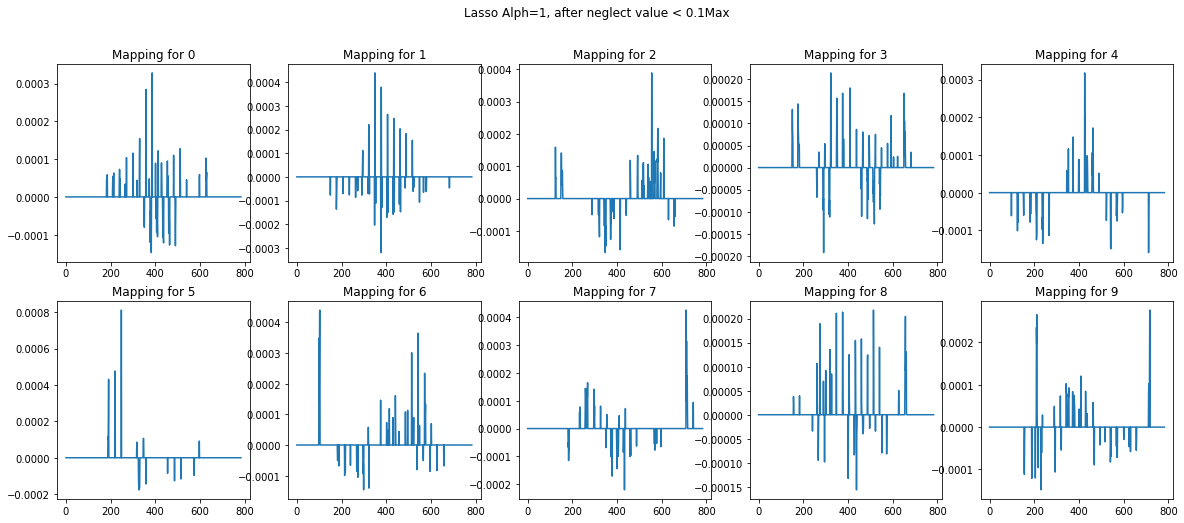

In [56]:
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.plot(coeffs_v6_mask_option1[i,:])
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=1, after neglect value < 0.1Max')
plt.show()

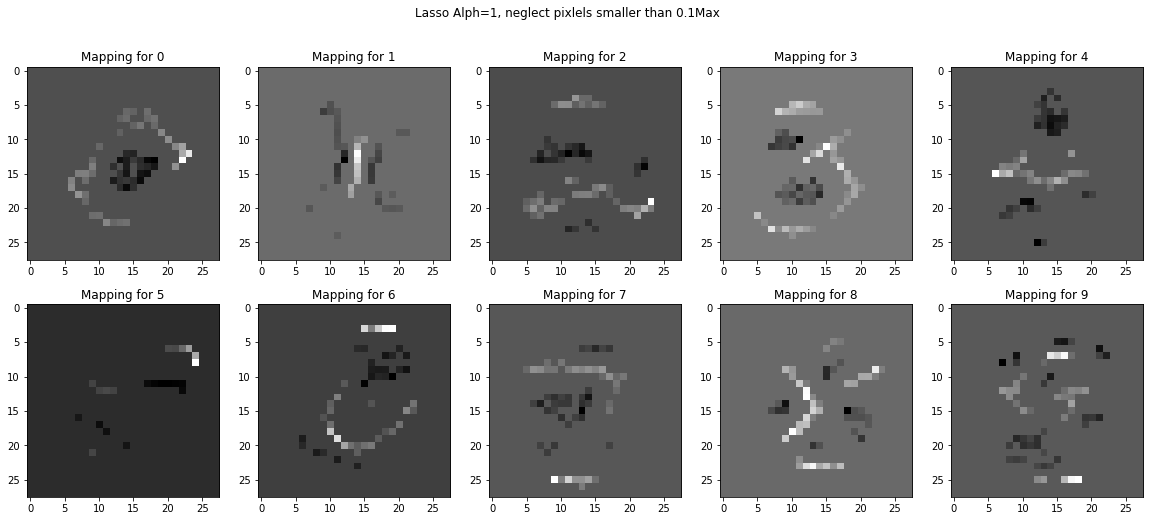

In [64]:
# plot first few images
plt.figure(figsize = (20,8))
for i in range(0,10):
  plt.subplot(2,5,1 + i)
  plt.imshow(np.reshape(coeffs_v6_mask_option1[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  plt.title('Mapping for '+ str(i))
# show the figure
plt.suptitle('Lasso Alph=1, neglect pixlels smaller than 0.1Max')
plt.show()

## Q3 apply most important pixels to the test data set 

in order to promote sparisity, use lasso with alpha=1, and replace the pixels that have small values with zeros, and then calculate the accuracy

In [58]:
print(trainX.shape)
print(coeffs_v6_mask_option1.shape)

(60000, 784)
(10, 784)


In [63]:
pred_test_lasso_neglect= np.dot(testX,coeffs_v6_mask_option1.T)

#accuray
testy_maxind=np.argmax(pred_test_lasso_neglect,axis=1)
accuracy= 100*np.sum(test_maxind[:]==testy[:])/np.size(testy)
print("Test: accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

Test: accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 85.34%


In [65]:
coeffs_v6_mask_option1.shape

(10, 784)

In [69]:
for i in range(10):
  pixels_used = np.sum(coeffs_v6_mask_option1[i,:]>0)
  print("number of pixels used for label " + str(i) + ": " + str(pixels_used))

number of pixels used for label 0: 37
number of pixels used for label 1: 10
number of pixels used for label 2: 42
number of pixels used for label 3: 44
number of pixels used for label 4: 24
number of pixels used for label 5: 11
number of pixels used for label 6: 27
number of pixels used for label 7: 29
number of pixels used for label 8: 37
number of pixels used for label 9: 29


## Q4 redo the analysis with each digit individually

Train: accuray for lasso (alpha=1)97.74%
Test: accuray for lasso (alpha=1): 97.53%
the number of pixels used for label 0: 36
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 88.17%


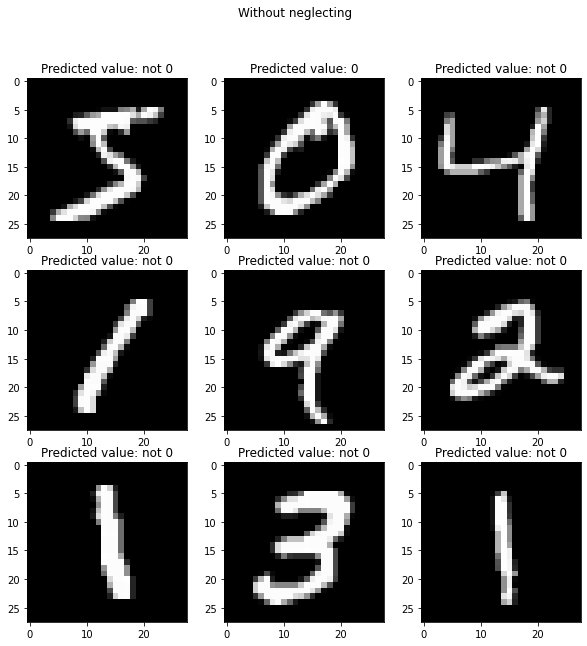

In [101]:
idx=0
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

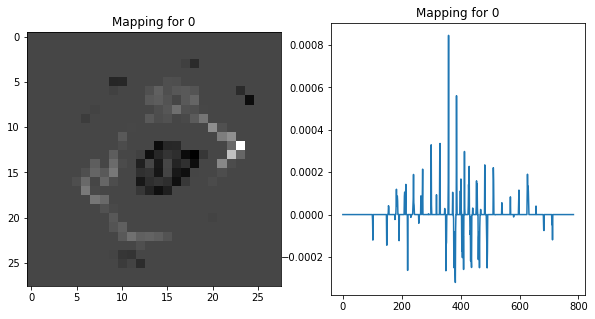

In [92]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)97.74%
Test: accuray for lasso (alpha=1): 97.96%
the number of pixels used for label 1: 15
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 87.21%


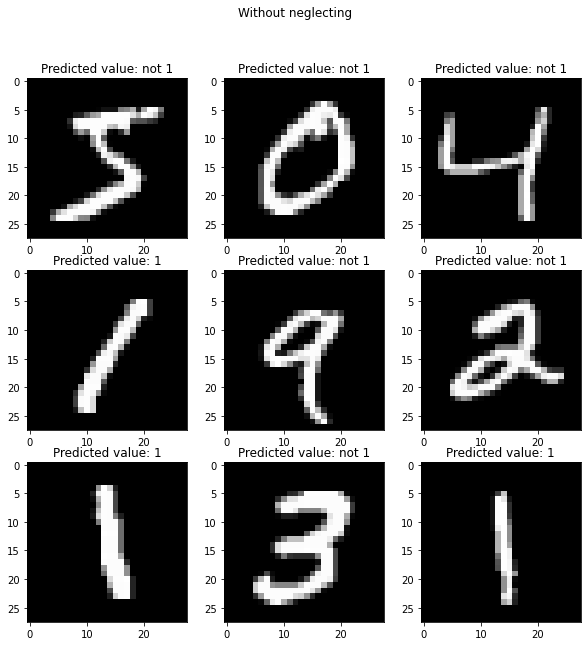

In [102]:
idx=1
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

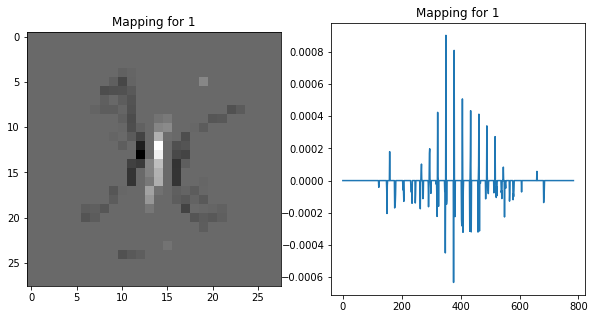

In [103]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)95.31%
Test: accuray for lasso (alpha=1): 95.23%
the number of pixels used for label 2: 52
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 54.84%


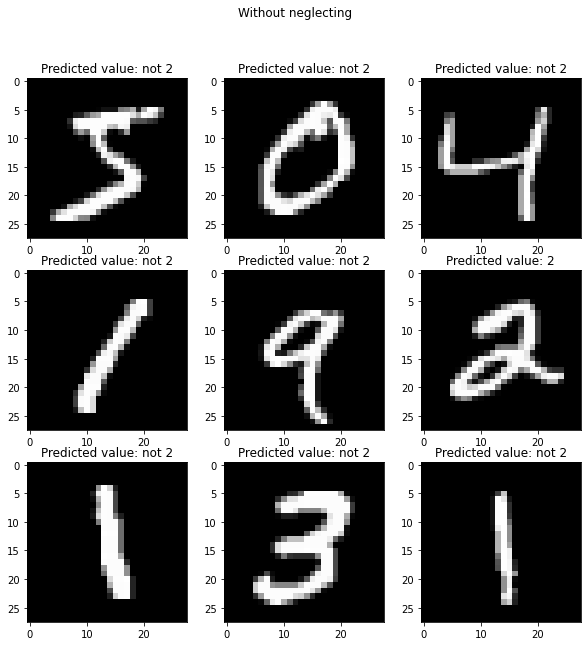

In [104]:
idx=2
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

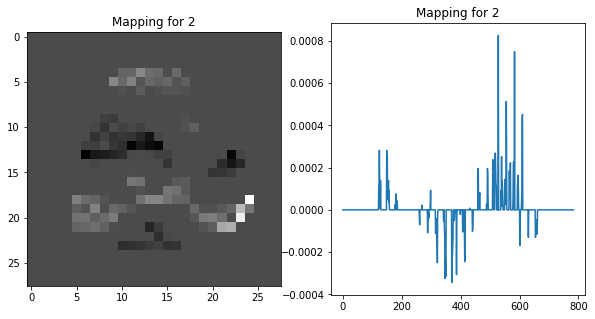

In [105]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)94.89%
Test: accuray for lasso (alpha=1): 95.18%
the number of pixels used for label 3: 53
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 42.74%


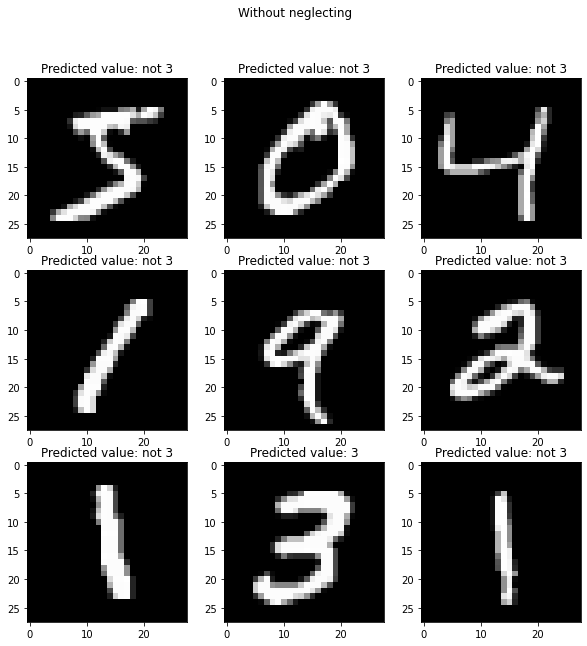

In [106]:
idx=3
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

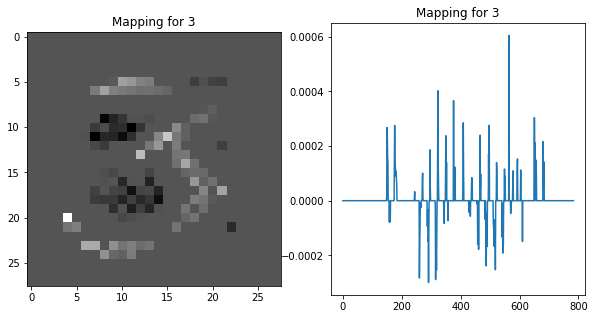

In [107]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)94.88%
Test: accuray for lasso (alpha=1): 95.03%
the number of pixels used for label 4: 33
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 79.98%


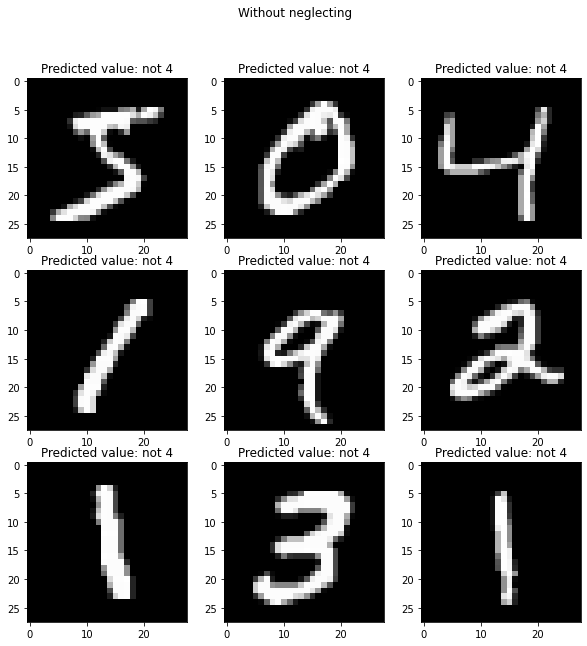

In [108]:
idx=4
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

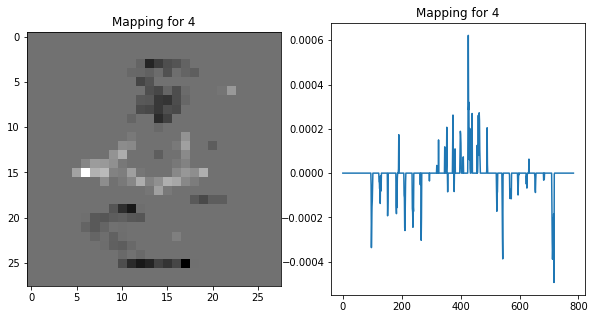

In [109]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)93.11%
Test: accuray for lasso (alpha=1): 93.51%
the number of pixels used for label 5: 16
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 88.47%


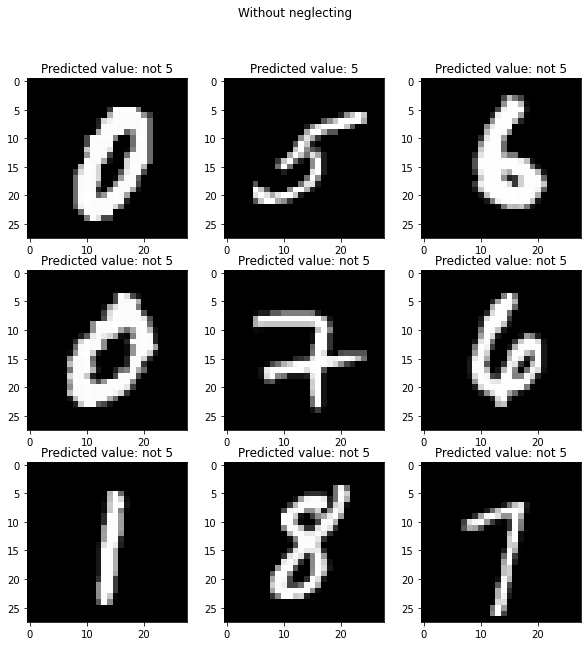

In [115]:
idx=5
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i+34,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i+34] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

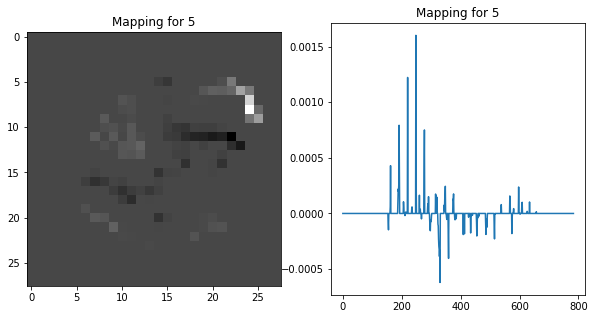

In [116]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)97.18%
Test: accuray for lasso (alpha=1): 96.93%
the number of pixels used for label 6: 33
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 37.7%


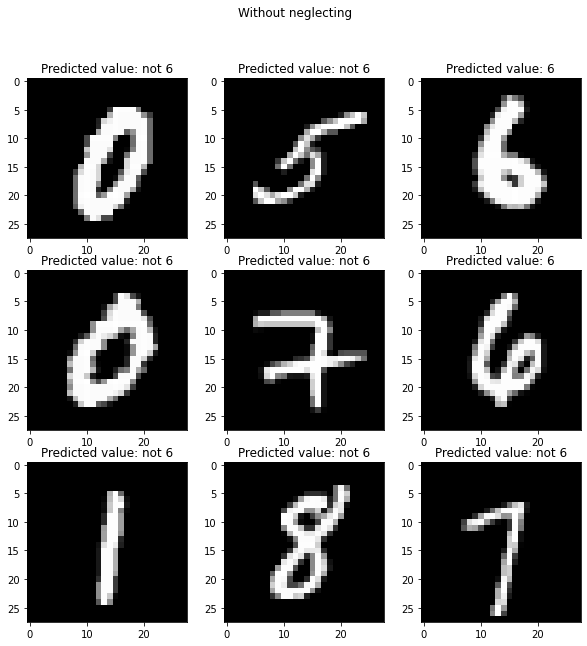

In [117]:
idx=6
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i+34,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i+34] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

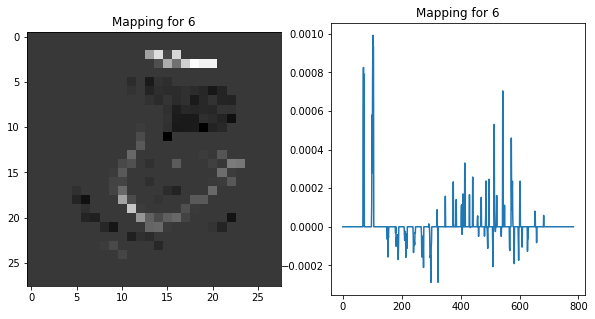

In [118]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)96.27%
Test: accuray for lasso (alpha=1): 96.36%
the number of pixels used for label 7: 36
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 82.69%


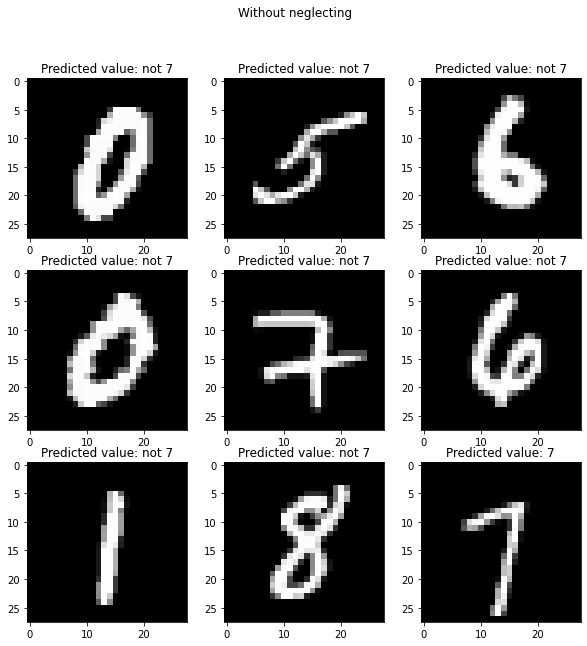

In [119]:
idx=7
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i+34,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i+34] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

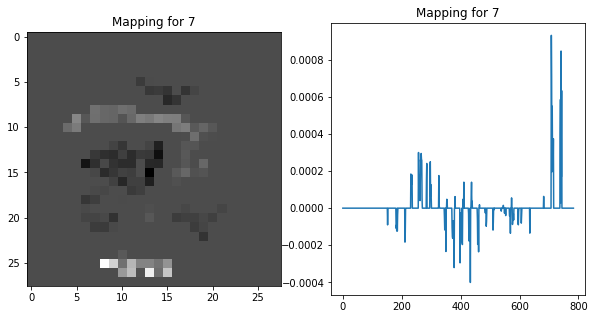

In [120]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)93.87%
Test: accuray for lasso (alpha=1): 93.89%
the number of pixels used for label 8: 51
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 12.9%


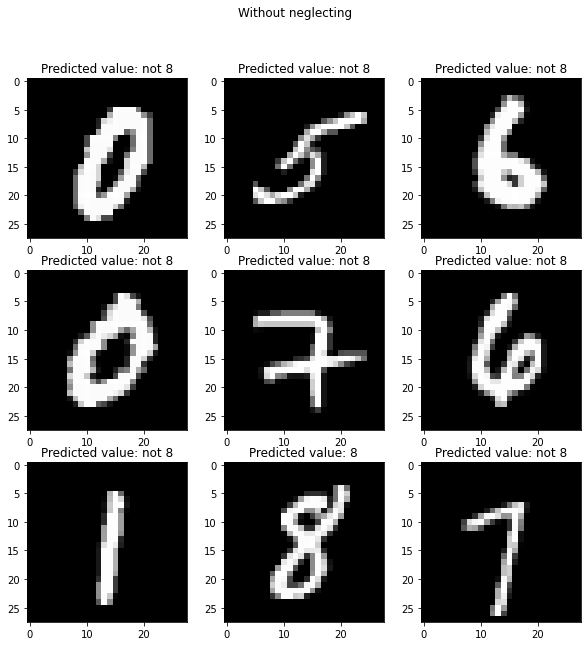

In [121]:
idx=8
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i+34,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i+34] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

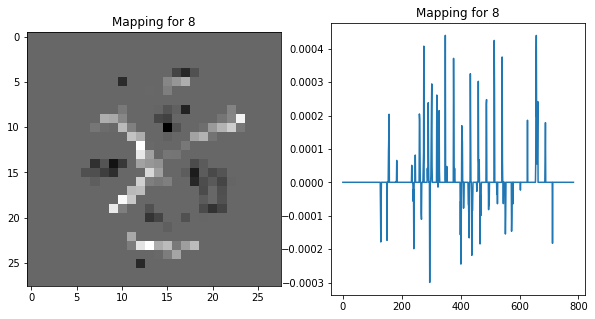

In [122]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()

Train: accuray for lasso (alpha=1)92.51%
Test: accuray for lasso (alpha=1): 92.8%
the number of pixels used for label 9: 29
Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: 34.35%


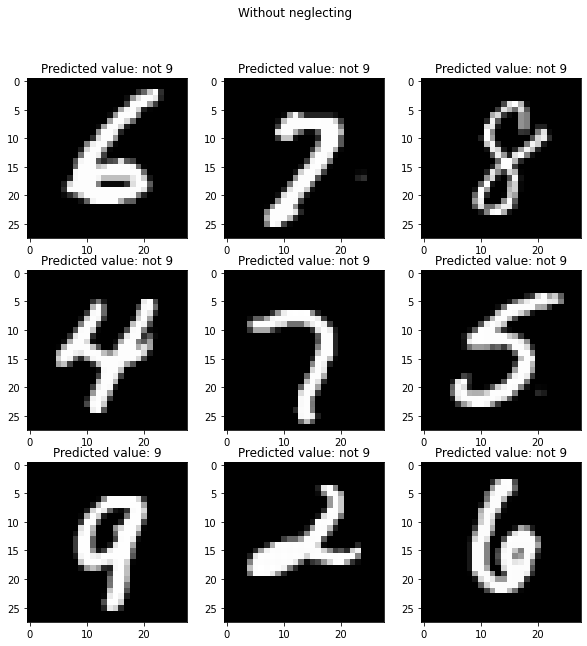

In [134]:
idx=9
trainy_ind = np.where(trainy==idx,1,-1)
testy_ind = np.where(testy==idx,1,-1)
model_lasso_ind = Lasso(alpha=1)
model_lasso_ind.fit(trainX, trainy_ind) 
pred_train_lasso_ind= np.sign(model_lasso_ind.predict(trainX))
pred_test_lasso_ind= np.sign(model_lasso_ind.predict(testX))
coeffs_ind = model_lasso_ind.coef_


#accuray
accuracy= 100*np.sum(pred_train_lasso_ind==trainy_ind)/np.size(trainy_ind)
print("Train: accuray for lasso (alpha=1)"  + str(np.around(accuracy,2))+"%")
accuracy= 100*np.sum(pred_test_lasso_ind[:]==testy_ind[:])/np.size(testy_ind)
print("Test: accuray for lasso (alpha=1): " + str(np.around(accuracy,2))+"%")

coeffs_ind_mask = np.where(abs(coeffs_ind) < 0.1*max(coeffs_ind),0, coeffs_ind)
print("the number of pixels used for label " + str(idx) + ": " + str(np.sum(coeffs_ind_mask>0)))
pred_test_lasso_neglect= np.sign(np.dot(testX,coeffs_ind_mask))
#accuray
accuracy= 100*np.sum(pred_test_lasso_neglect==testy_ind[:])/np.size(testy_ind)
print("Individual: Test accuray for lasso (alpha=1), neglect pixels smaller than 0.1 max: " + str(np.around(accuracy,2))+"%")

# print the predicted values using lasso by promoting sparsity
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.reshape(trainX[i+794,:],(28,28)), cmap=plt.get_cmap('gray'))
  if pred_train_lasso_ind[i+794] == 1:
    plt.title('Predicted value: ' + str(idx))
  else:
    plt.title('Predicted value: not '+ str(idx))
plt.suptitle('Without neglecting')
plt.show()

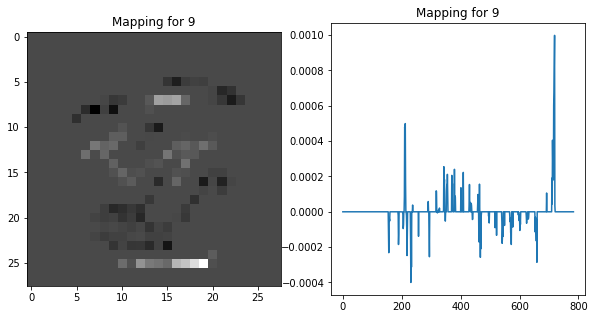

In [135]:
# plot the mapping 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.reshape(coeffs_ind,(28,28)), cmap=plt.get_cmap('gray'))
plt.title('Mapping for '+ str(idx))

plt.subplot(1,2,2)
plt.plot(coeffs_ind)
plt.title('Mapping for '+ str(idx))
plt.show()